In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wandb

In [2]:
api = wandb.Api()

In [3]:
StrXL_250 = ["StrXL/2pk0pqoa", "StrXL/bx0t0h66", "StrXL/mf0utx5m", "StrXL/vhz326w4", "StrXL/fbfb28as"]
StrXL_500 = ["StrXL/x9v1kz8w", "StrXL/gceu0ug6", "StrXL/3s1fwyqi", "StrXL/2cty5spo", "StrXL/27e6knks"]
StrXL_750 = ["StrXL/nit4tmke", "StrXL/5odjciex", "StrXL/w9vs9nlo", "StrXL/1brlero2", "StrXL/10n9wqv0"]

Compressed = ["StrXL_Compressed/46fk3x51", "StrXL_Compressed/ru5fte9s", "StrXL_Compressed/vmybwsdf", "StrXL_Compressed/4nn0xnxb", "StrXL_Compressed/16cl8wjm"]


Str = ["Str/2zc67i99", "Str/21ai4610", "Str/ucpia8iz", "Str/5f5qbebn", "Str/1yr6iyb5"]

In [4]:
StrXL_250_Data = [
    api.run(StrXL_250[0]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_250[1]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_250[2]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_250[3]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_250[4]).history(samples=3000)['val_sparse_categorical_accuracy']]

In [5]:
StrXL_500_Data = [
    api.run(StrXL_500[0]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_500[1]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_500[2]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_500[3]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_500[4]).history(samples=3000)['val_sparse_categorical_accuracy']]

In [6]:
StrXL_750_Data = [
    api.run(StrXL_750[0]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_750[1]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_750[2]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_750[3]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(StrXL_750[4]).history(samples=3000)['val_sparse_categorical_accuracy']]

In [7]:
Compressed_Data = [
    api.run(Compressed[0]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Compressed[1]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Compressed[2]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Compressed[3]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Compressed[4]).history(samples=3000)['val_sparse_categorical_accuracy']]

In [8]:
Str_Data = [
    api.run(Str[0]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Str[1]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Str[2]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Str[3]).history(samples=3000)['val_sparse_categorical_accuracy'],
    api.run(Str[4]).history(samples=3000)['val_sparse_categorical_accuracy']]

In [9]:
meanStrXL_250 = np.mean(StrXL_250_Data, axis=0)
meanStrXL_500 = np.mean(StrXL_500_Data, axis=0)
meanStrXL_750 = np.mean(StrXL_750_Data, axis=0)
meanCompressed = np.mean(Compressed_Data, axis=0)
meanStr = np.mean(Str_Data, axis=0)

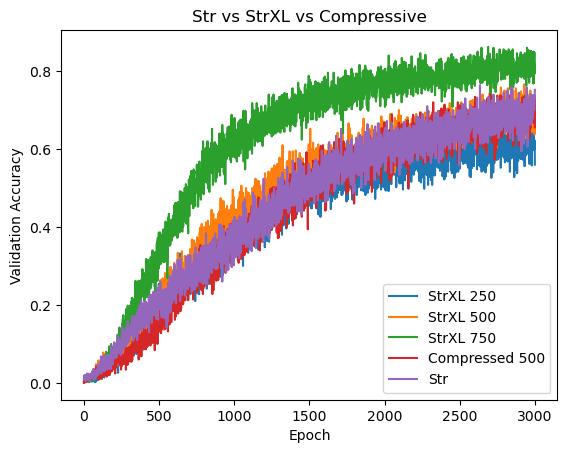

In [10]:
plt.figure(1)
plt.plot(meanStrXL_250, label="StrXL 250")
plt.plot(meanStrXL_500, label="StrXL 500")
plt.plot(meanStrXL_750, label="StrXL 750")
plt.plot(meanCompressed, label="Compressed 500")
plt.plot(meanStr, label="Str")
plt.legend()
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Str vs StrXL vs Compressive')
# plt.savefig('Vanillas.svg')
plt.show()

In [11]:
accuraciesStrXL_250 = np.array(StrXL_250_Data)
accuraciesStrXL_500 = np.array(StrXL_500_Data)
accuraciesStrXL_750 = np.array(StrXL_750_Data)

accuraciesCompressed = np.array(Compressed_Data)

accuraciesStr = np.array(Str_Data)

In [49]:
def Confidence_Interval(accuracies, interval=4, **kwargs):
    accuracies = np.array(accuracies)
    x = np.arange(accuracies.shape[1])[::interval]
    y = accuracies[:,::interval]

    ci = 1.96 * np.std(y, axis=0) / np.sqrt(len(y))
    
    plt.figure(1)

    plt.plot(x, np.mean(y, axis=0), **kwargs)
    
    plt.legend()
    plt.ylabel('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.title('Str vs StrXL vs Compressive')
    plt.fill_between(x, (np.mean(y, axis=0) - ci), (np.mean(y, axis=0) + ci), alpha=0.5)

In [50]:
interval = 40

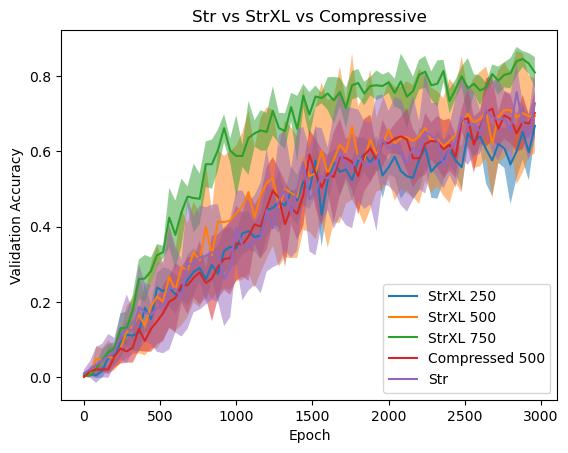

In [51]:
Confidence_Interval(StrXL_250_Data, interval, label="StrXL 250")
Confidence_Interval(StrXL_500_Data, interval, label="StrXL 500")
Confidence_Interval(StrXL_750_Data, interval, label="StrXL 750")
Confidence_Interval(Compressed_Data,interval, label="Compressed 500")
Confidence_Interval(Str_Data, interval, label="Str")
# plt.savefig('Vanillas.svg')
plt.show()

In [14]:
import pandas as pd

In [15]:
 table = pd.DataFrame(
    [
        ["StrXL (250)", np.mean(accuraciesStrXL_250, axis=0)[-1], 1.96 * np.std(accuraciesStrXL_250, axis=0)[-1]/np.sqrt(len(accuraciesStrXL_250))],
        ["StrXL (500)", np.mean(accuraciesStrXL_500, axis=0)[-1], 1.96 * np.std(accuraciesStrXL_500, axis=0)[-1]/np.sqrt(len(accuraciesStrXL_500))],
        ["StrXL (750)", np.mean(accuraciesStrXL_750, axis=0)[-1], 1.96 * np.std(accuraciesStrXL_750, axis=0)[-1]/np.sqrt(len(accuraciesStrXL_750))],
        ["Compressive (500)", np.mean(accuraciesCompressed, axis=0)[-1], 1.96 * np.std(accuraciesCompressed, axis=0)[-1]/np.sqrt(len(accuraciesCompressed))],
        ["Str", np.mean(accuraciesStr, axis=0)[-1], 1.96 * np.std(accuraciesStr, axis=0)[-1]/np.sqrt(len(accuraciesCompressed))],
    ],
    columns=["Model", "Mean", "95% CI"])
      
table

,Model,Mean,95% CI
0,StrXL (250),0.560,0.100401
1,StrXL (500),0.704,0.088283
2,StrXL (750),0.818,0.054430
3,Compressive (500),0.656,0.076133
4,Str,0.752,0.074665


In [16]:
table.style.highlight_max(["Mean"], props="font-weight: bold").highlight_min(["95% CI"], props="font-weight: bold").hide().format("{:.3f}", ["Mean", "95% CI"]).to_latex("Results.tex", hrules=True, convert_css=True)

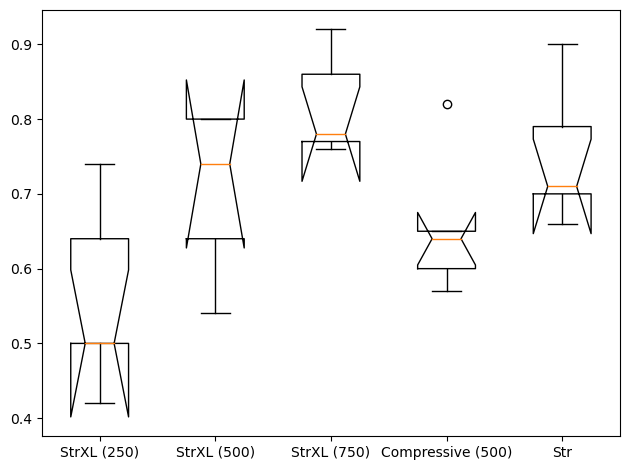

In [30]:
plt.boxplot([accuraciesStrXL_250[:,-1], accuraciesStrXL_500[:,-1], accuraciesStrXL_750[:,-1], accuraciesCompressed[:,-1], accuraciesStr[:,-1]] ,
            notch=True, labels=["StrXL (250)", "StrXL (500)", "StrXL (750)", "Compressive (500)", "Str"])
plt.tight_layout()

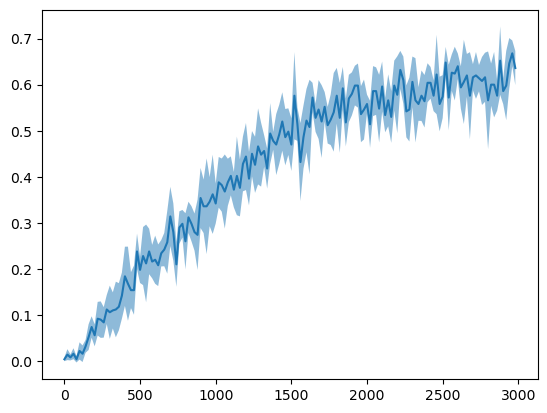

In [17]:
Confidence_Interval(accuraciesStrXL_250, interval)

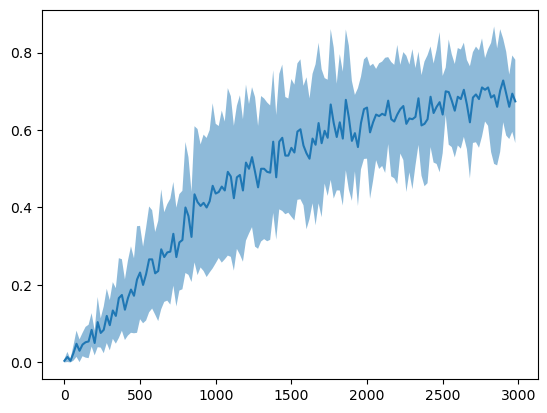

In [18]:
Confidence_Interval(accuraciesStrXL_500, interval)

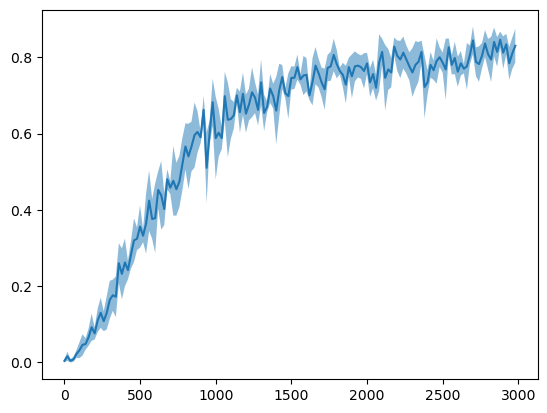

In [19]:
Confidence_Interval(accuraciesStrXL_750, interval)

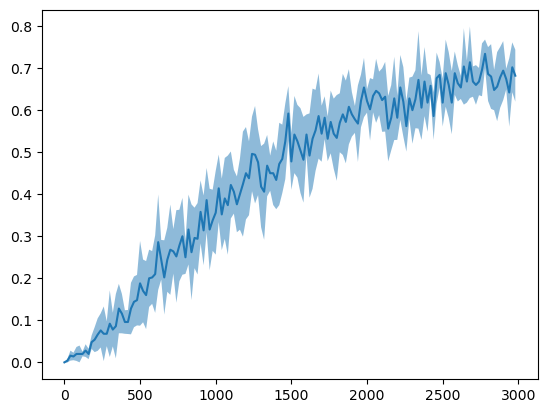

In [20]:
Confidence_Interval(accuraciesCompressed, interval)

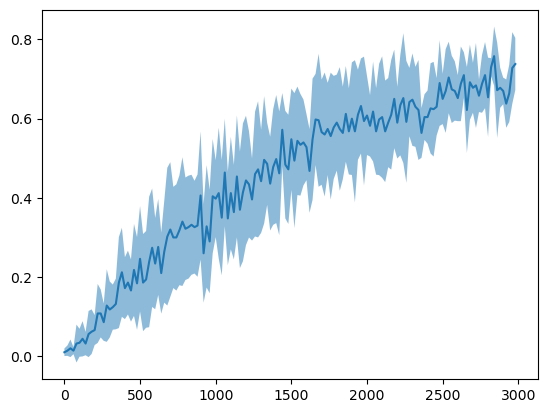

In [21]:
Confidence_Interval(accuraciesStr, interval)